In [1]:
# Import support for Cython
import setuptools
%load_ext Cython

## A Practical Example - Part I

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from beam import beam

# Parameters
E  = 1e8
L  = 1.0
h0 = 2e-2
h1 = 1e-2
P0 = 1.0
P1 = 2.0
I0 = E*h0**3/12

# Creating the solver object
opts = {
    "boundary"  : ["cc", "ff"],
    "length"    : L,
    "nElem"     : 1000,
    "modulus"   : E
    }
sol = beam.FESolver(**opts)

Update parameters: 0.0000 ms
Setup System:      7.0000 ms
Solve System:      0.9999 ms


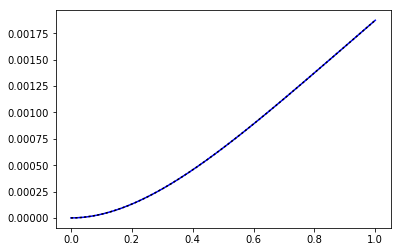

In [6]:
from beam import npUtils
from beam import cyUtils
from beam import pcUtils

# Constant loading, constant thickness
f1 = lambda x: P0/I0/24.0 * x**2 * (x**2 - 4.0*L*x + 6.0*L*L)
sol(utils = pcUtils,
    load = lambda x: P0*np.ones_like(x),
    thickness = [h0])
g = sol.plotSolution(sty='b-')
plt.plot(sol.coor, f1(sol.coor), 'k:', label='Case 1')

plt.show()